# **Hierarchical Clustering**

## **Overview**

Hierarchical clustering is an unsupervised machine learning algorithm used to group similar objects into clusters. Unlike K-Means clustering, which requires specifying the number of clusters in advance, hierarchical clustering creates a hierarchy of clusters by either successively merging smaller clusters (agglomerative) or successively splitting a larger cluster (divisive). It generates a dendrogram, a tree-like diagram that represents the merging or splitting process.

Hierarchical clustering can be divided into two main types:
1. **Agglomerative Hierarchical Clustering (Bottom-up approach)**
2. **Divisive Hierarchical Clustering (Top-down approach)**

The most commonly used method is **Agglomerative Hierarchical Clustering**, where each data point starts in its own cluster, and pairs of clusters are merged as the algorithm progresses.

---

## **How Hierarchical Clustering Works**

### **1. Agglomerative (Bottom-up) Approach**

In agglomerative hierarchical clustering, each data point is initially considered as its own cluster. The algorithm then performs the following steps iteratively:
1. **Compute the proximity matrix**: Calculate the distances (or similarities) between all pairs of data points.
2. **Merge the closest clusters**: Identify the two clusters with the smallest distance between them and merge them into a single cluster.
3. **Update the proximity matrix**: Recompute the proximity matrix by considering the new cluster formed and its distance to other clusters.
4. **Repeat the process**: Continue merging the closest clusters until all data points belong to a single cluster.

### **2. Divisive (Top-down) Approach**

Divisive hierarchical clustering begins with all data points in a single cluster. The algorithm then recursively splits the cluster into smaller clusters until each data point is in its own cluster or a predefined stopping criterion is met. While less commonly used, this method can be more computationally expensive than the agglomerative approach.

---

## **Distance Measures**

The choice of distance measure significantly impacts the clustering process. Common distance metrics used in hierarchical clustering include:
- **Euclidean Distance**: The straight-line distance between two points in the feature space.
- **Manhattan Distance**: The sum of the absolute differences between the coordinates of two points.
- **Cosine Similarity**: A measure of similarity between two vectors based on their angle (used for text data or when working with vectors).

---

## **Linkage Criteria**

The linkage criterion defines how the distance between clusters is calculated. Some common linkage methods include:

1. **Single Linkage (Nearest Point Linkage)**:
   - The distance between two clusters is the shortest distance between any single member of one cluster and any single member of the other cluster. 
   - This method can result in long, "chained" clusters, making it sensitive to noise.

   $$ \text{Distance between clusters} = \min(d(a,b)) $$

2. **Complete Linkage (Farthest Point Linkage)**:
   - The distance between two clusters is the longest distance between any single member of one cluster and any single member of the other cluster. 
   - This method tends to create compact clusters.

   $$ \text{Distance between clusters} = \max(d(a,b)) $$

3. **Average Linkage**:
   - The distance between two clusters is the average of the distances between all pairs of points in the two clusters.

   $$ \text{Distance between clusters} = \frac{1}{n_1n_2} \sum_{i=1}^{n_1} \sum_{j=1}^{n_2} d(x_i, y_j) $$

4. **Ward’s Linkage (Minimum Variance)**:
   - This method minimizes the total within-cluster variance when merging clusters. It generally leads to more balanced clusters.

   $$ \text{Distance between clusters} = \sqrt{\frac{(n_1+n_2)}{n_1n_2}(||C_1 - C_2||^2)} $$

---

## **Dendrogram**

A **dendrogram** is a tree-like diagram that visually represents the hierarchical clustering process. It shows the order in which clusters are merged (or split) and the distance at which the merging occurs. The vertical axis of the dendrogram represents the distance or dissimilarity between clusters, while the horizontal axis represents individual data points or clusters.

### **Interpreting the Dendrogram**
- The **height** of the branches represents the distance or dissimilarity between clusters. The lower the height, the more similar the clusters are.
- A **cut-off point** can be chosen by drawing a horizontal line across the dendrogram at a specific height to determine the number of clusters. The clusters formed below this line are the final clusters.

---

## **Advantages of Hierarchical Clustering**

- **No need to specify the number of clusters** in advance.
- **Produces a dendrogram**, which provides a detailed view of the data structure and the merging process.
- **Works well for small datasets** and for cases where the number of clusters is not known.
- Can identify clusters of different shapes and sizes, unlike K-Means, which assumes spherical clusters.

---

## **Disadvantages of Hierarchical Clustering**

- **Computationally expensive**: The algorithm has a time complexity of \(O(n^2)\) for the agglomerative approach, making it less efficient for large datasets.
- **Sensitive to noise and outliers**: Especially with single linkage, outliers can distort the results.
- **Not scalable to very large datasets**: Hierarchical clustering becomes impractical for datasets with millions of data points.

---

## **Applications of Hierarchical Clustering**

- **Gene expression data analysis**: Identifying groups of genes with similar expression patterns.
- **Customer segmentation**: Grouping customers based on purchasing behavior.
- **Document clustering**: Grouping similar documents or topics together.
- **Image segmentation**: Segmenting images into regions with similar properties.
  
---

## **Example of Hierarchical Clustering in Python**

```python
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate synthetic data
X, y = make_blobs(n_samples=10, centers=3, random_state=42)

# Perform agglomerative clustering
model = AgglomerativeClustering(n_clusters=3)
y_pred = model.fit_predict(X)

# Plotting the dendrogram
linked = linkage(X, 'single')
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()
```

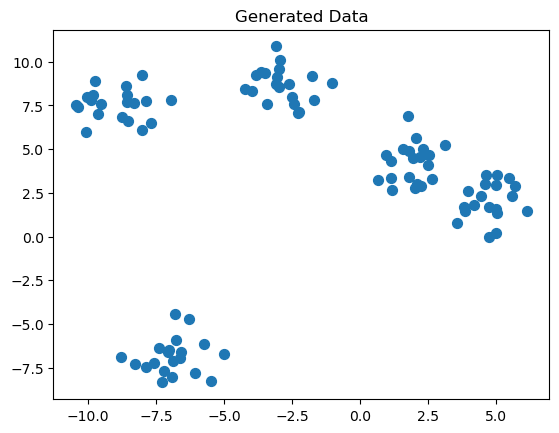

In [2]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate 2D sample data
X, y_true = make_blobs(n_samples=100, centers=5, cluster_std=1.0, random_state=42)

# Plot the data
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Generated Data")
plt.show()


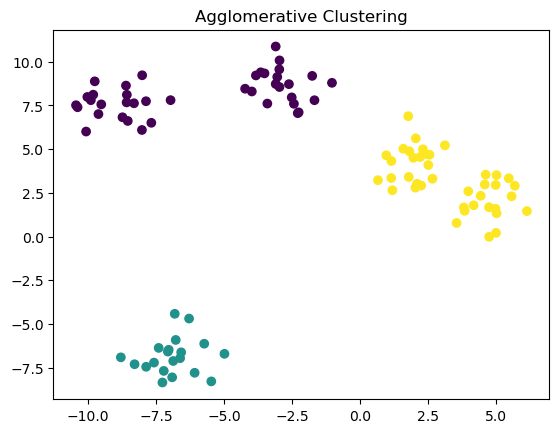

In [3]:
from sklearn.cluster import AgglomerativeClustering

# Agglomerative clustering with 3 clusters
agg = AgglomerativeClustering(n_clusters=3)
y_agg = agg.fit_predict(X)

# Plotting
plt.scatter(X[:, 0], X[:, 1], c=y_agg, cmap='viridis')
plt.title("Agglomerative Clustering")
plt.show()


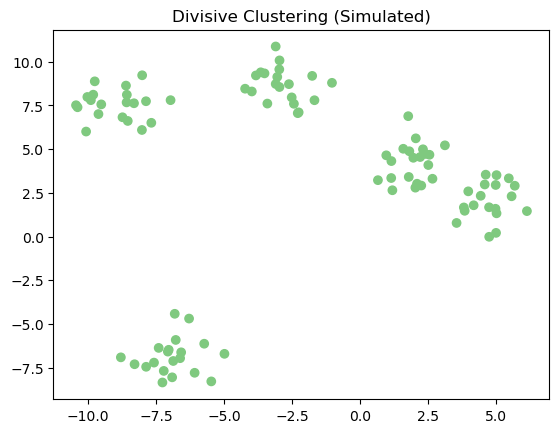

In [4]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Recursive divisive function
def divisive_clustering(X, depth=2):
    labels = np.zeros(len(X), dtype=int)
    cluster_id = 1
    
    def split(indices, current_depth):
        nonlocal cluster_id
        if current_depth == 0 or len(indices) <= 1:
            return
        clf = DecisionTreeClassifier(max_depth=1)
        clf.fit(X[indices], np.ones(len(indices)))
        preds = clf.apply(X[indices])
        unique_preds = np.unique(preds)
        for up in unique_preds:
            sub_indices = indices[preds == up]
            labels[sub_indices] = cluster_id
            cluster_id += 1
            split(sub_indices, current_depth - 1)
    
    split(np.arange(len(X)), depth)
    return labels

# Run divisive clustering
y_div = divisive_clustering(X, depth=2)

# Plotting
plt.scatter(X[:, 0], X[:, 1], c=y_div, cmap='Accent')
plt.title("Divisive Clustering (Simulated)")
plt.show()
